In [3]:
import os
import sklearn
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Demonstrational part

### Binary classification

In [4]:
from sklearn.svm import SVC, SVR
from sklearn import datasets

iris = datasets.load_iris()

## звузимо задачу до двох ознак, бінарної класифікації
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=1000) # C=float("inf") відповідає нульовій толерантності до "порушників коридору"
svm_clf.fit(X, y)

SVC(C=1000, kernel='linear')

Let's visualiaze the decision boundary of the obtained model, and the margin

In [3]:
svm_clf.coef_

array([[1.29411744, 0.82352928]])

In [4]:
svm_clf.intercept_

array([-3.78823471])

In [5]:
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

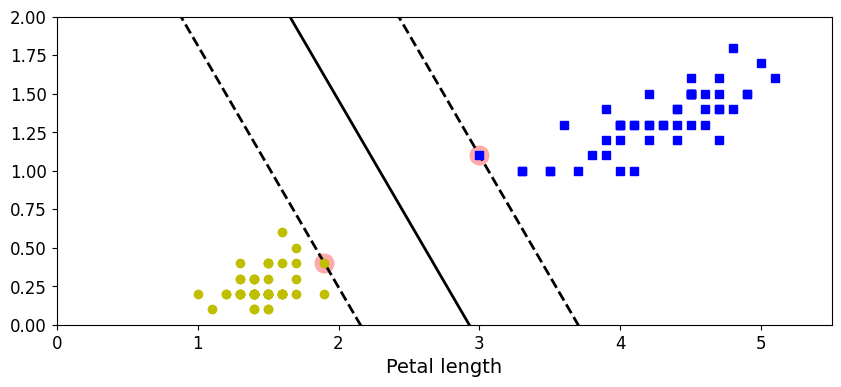

In [9]:
x0 = np.linspace(0, 5.5, 200)

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # Розділова пряма виглядає як w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1] # проекція на вертикальну вісь
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=1, figsize=(10,4), sharey=True)

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

In [6]:
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

# Sensitivity to scaling

In [10]:
# synthetic dataset
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

# model training
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

SVC(C=100, kernel='linear')

(0.0, 6.0, 0.0, 90.0)

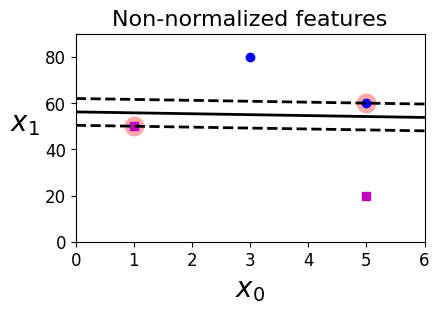

In [11]:
plt.figure(figsize=(4.5,2.7))
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")

## use the function defined before
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Non-normalized features", fontsize=16)
plt.axis([0, 6, 0, 90])

In [12]:
### Features normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
# help(StandardScaler)

In [14]:
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

SVC(C=100, kernel='linear')

(-2.0, 2.0, -2.0, 2.0)

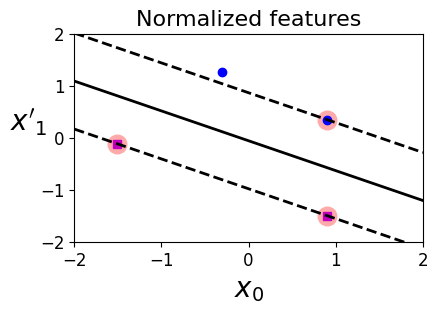

In [15]:
plt.figure(figsize=(4.5,2.7))
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Normalized features", fontsize=16)
plt.axis([-2, 2, -2, 2])

# Sensitivity to outliers (for a rigid model)

Let's add a couple of outliers to iris dataset

In [16]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

Model training with low tolerancy to "non-fitting" samples

In [17]:
svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

SVC(C=1000000000, kernel='linear')

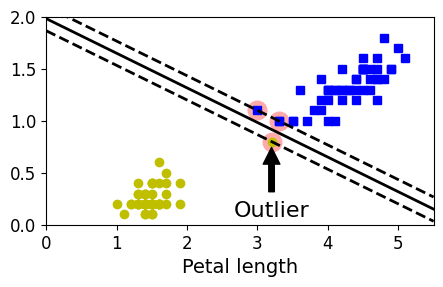

In [18]:
fig, axes = plt.subplots(ncols=1, figsize=(5,2.7), sharey=True)

plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()

Let's decrease the value of parameter C that controls the intolerance to outliers, to 1.

In [19]:
svm_clf3 = SVC(kernel="linear", C=1)
svm_clf3.fit(Xo2, yo2)

SVC(C=1, kernel='linear')

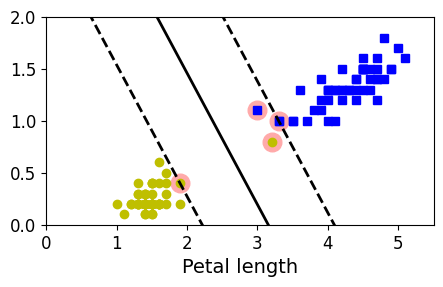

In [20]:
fig, axes = plt.subplots(ncols=1, figsize=(5,2.7), sharey=True)

plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf3, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

# Non-linear classification problem

Synthetic dataset generation

In [21]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [22]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

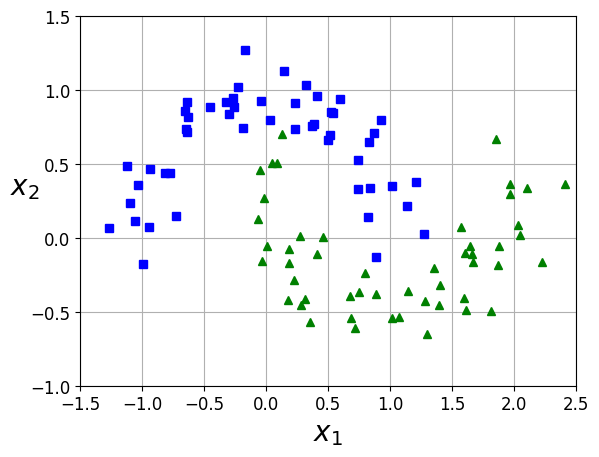

In [23]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### Polynomial kernel

We can explicitly map features to another space

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

In [25]:
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

In [26]:
polynomial_svm_clf.fit(X, y)

C:\Users\Pavlo\anaconda3\envs\studying\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Pavlo\anaconda3\envs\studying\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

In [27]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

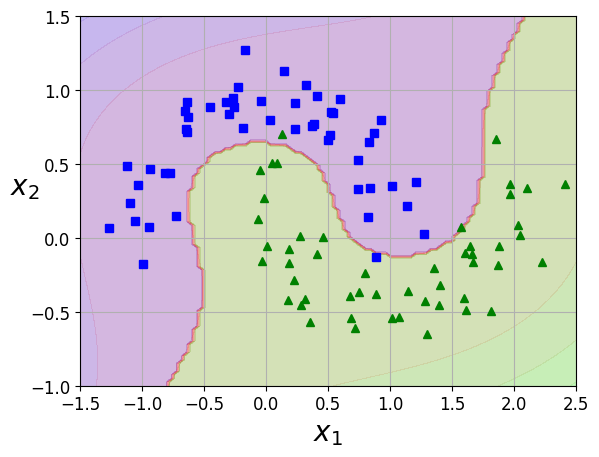

In [28]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Or, we can use a polynomial kernel

In [29]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [30]:
## більше про поліноміальне ядро
# help(sklearn.metrics.pairwise.polynomial_kernel)

In [31]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

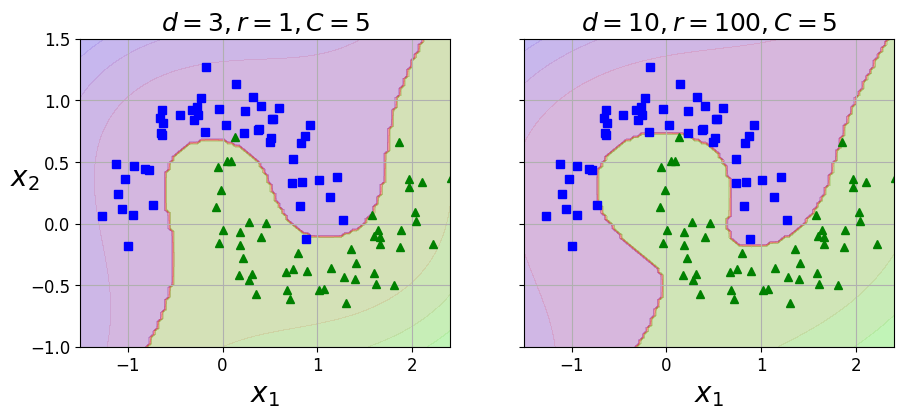

In [32]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

Higher degree of polynomial kernel --> higher model complexity, which can lead to overfitting

### Gaussian kernel (radial basis functions)

In [33]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

In [34]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
y1D = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

(-4.5, 4.5, -0.2, 0.2)

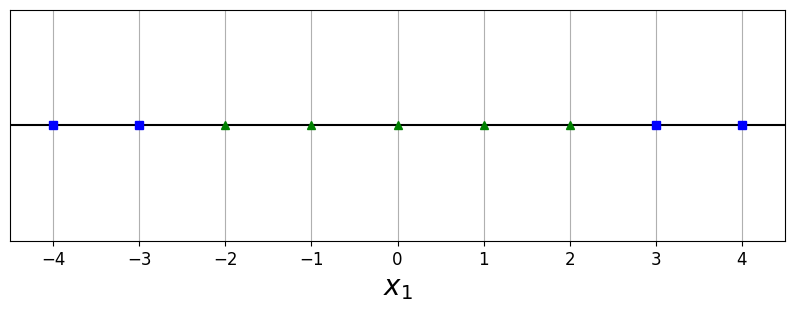

In [35]:
plt.figure(figsize=(10, 3))

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y1D==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y1D==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

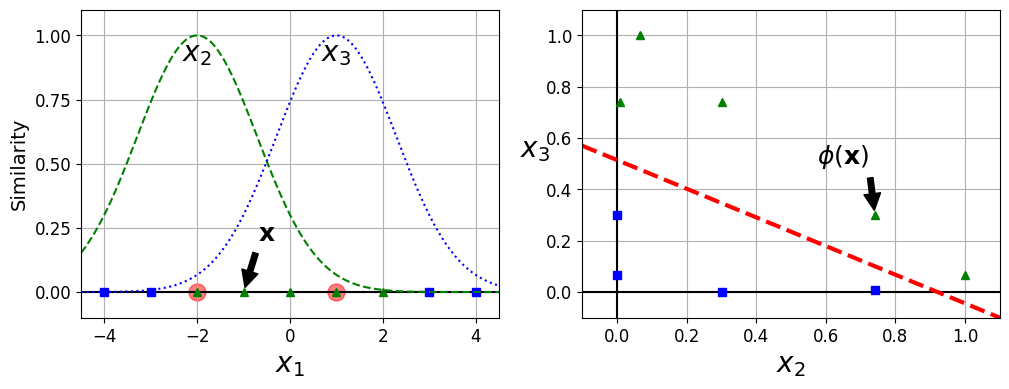

In [36]:
gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])

plt.subplots_adjust(right=1)

plt.show()

Let's go back to iris classification problem

In [37]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

Different values of parameters gamma and C

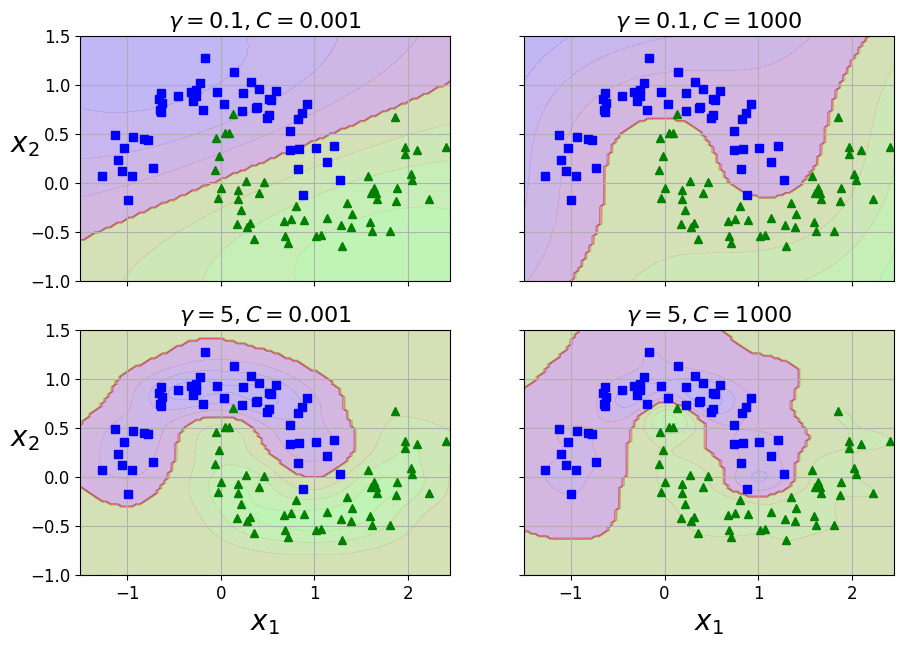

In [38]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

# Choosing optimal hyperparameters

In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [40]:
dataset = load_breast_cancer()

In [41]:
X, y = dataset['data'], dataset['target']

In [42]:
y.shape

(569,)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y, test_size=0.3)

In [44]:
svm_clf = SVC(kernel="rbf", random_state=42)
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

In [45]:
y_pred = svm_clf.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred)

0.9064327485380117

Let's try to find best hyperparameters for our model

In [47]:
from sklearn.model_selection import  GridSearchCV

In [48]:
# Parameters search
param_grid = {
    'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'C': [0.1,1,5,10, 20, 40, 80, 160, 320],
}
search = GridSearchCV(svm_clf, param_grid, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.962):
{'C': 160, 'gamma': 1e-05}


In [49]:
svm_clf_best = SVC(kernel="rbf", **search.best_params_, random_state=42)
svm_clf_best.fit(X_train, y_train)

SVC(C=160, gamma=1e-05, random_state=42)

In [50]:
y_pred = svm_clf_best.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred)

0.9298245614035088

Random search

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.00001, 0.1), "C": uniform(1, 200)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=45, verbose=1, cv=5)
rnd_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


RandomizedSearchCV(cv=5, estimator=SVC(random_state=42), n_iter=45,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002C843D34EC0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002C843D34FE0>},
                   verbose=1)

In [53]:
print(rnd_search_cv.best_params_)

{'C': 66.69073005721118, 'gamma': 2.1089879115514178e-05}


In [54]:
svm_clf_best2 = SVC(kernel="rbf", **rnd_search_cv.best_params_, random_state=42)
svm_clf_best2.fit(X_train, y_train)

SVC(C=66.69073005721118, gamma=2.1089879115514178e-05, random_state=42)

In [55]:
y_pred = svm_clf_best2.predict(X_test)
accuracy_score(y_test, y_pred)

0.935672514619883

# Regression problem

In [56]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [57]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

C:\Users\Pavlo\anaconda3\envs\studying\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(epsilon=1.5, random_state=42)

In [58]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

C:\Users\Pavlo\anaconda3\envs\studying\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Pavlo\anaconda3\envs\studying\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


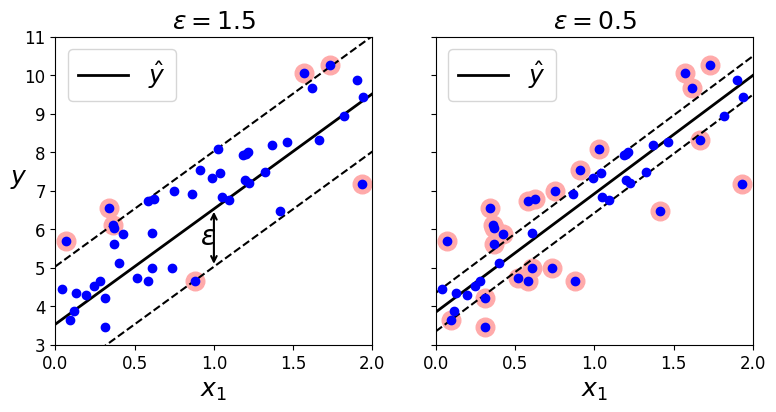

In [59]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

In [60]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [61]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [62]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

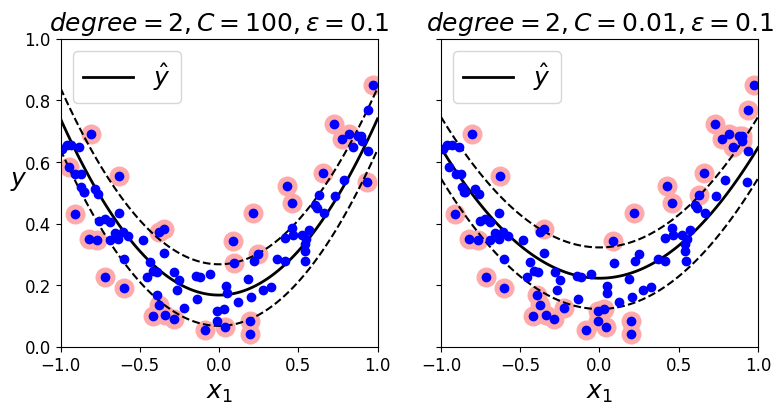

In [63]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

# Assignment

Problem 1. Download handwritten digits dataset MNIST as specified below. Train SVM with a linear kernel. What is the obtained accuracy? Train also logistic regression model.

In [31]:
from sklearn.datasets import fetch_openml
from sklearn.svm import LinearSVC
import numpy as np

mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

C:\Users\Pavlo\anaconda3\envs\studying\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
from sklearn.svm import LinearSVC

svm_clf = LinearSVC()
svm_clf.fit(X_train, y_train)

svm_accuracy = svm_clf.score(X_test, y_test)
print("LinearSVC Accuracy:", svm_accuracy)


C:\Users\Pavlo\anaconda3\envs\studying\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC Accuracy: 0.8553


C:\Users\Pavlo\anaconda3\envs\studying\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
log_reg = LogisticRegression()

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Calculate accuracy on the test data
log_reg_accuracy = log_reg.score(X_test, y_test)
print("Logistic Regression Accuracy:", log_reg_accuracy)


Logistic Regression Accuracy: 0.9255


C:\Users\Pavlo\anaconda3\envs\studying\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


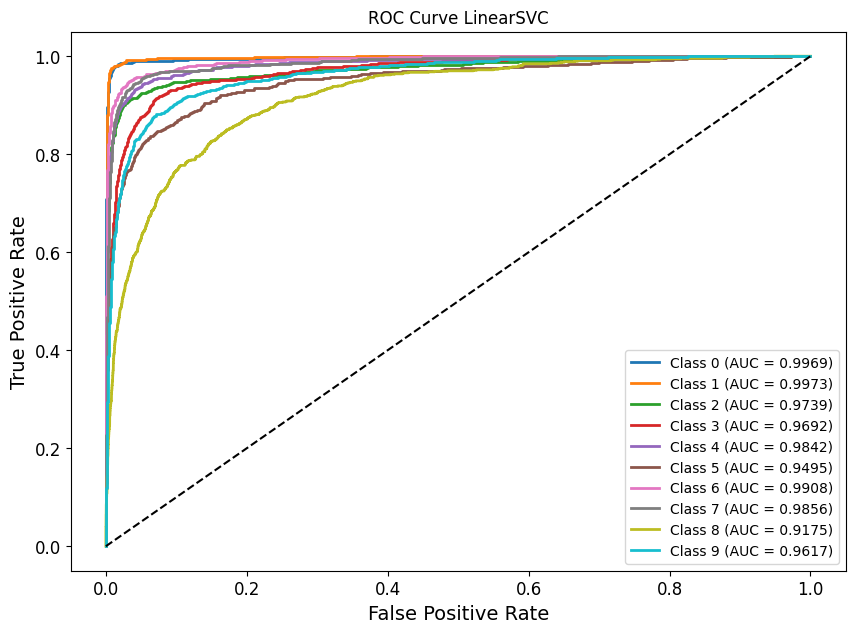

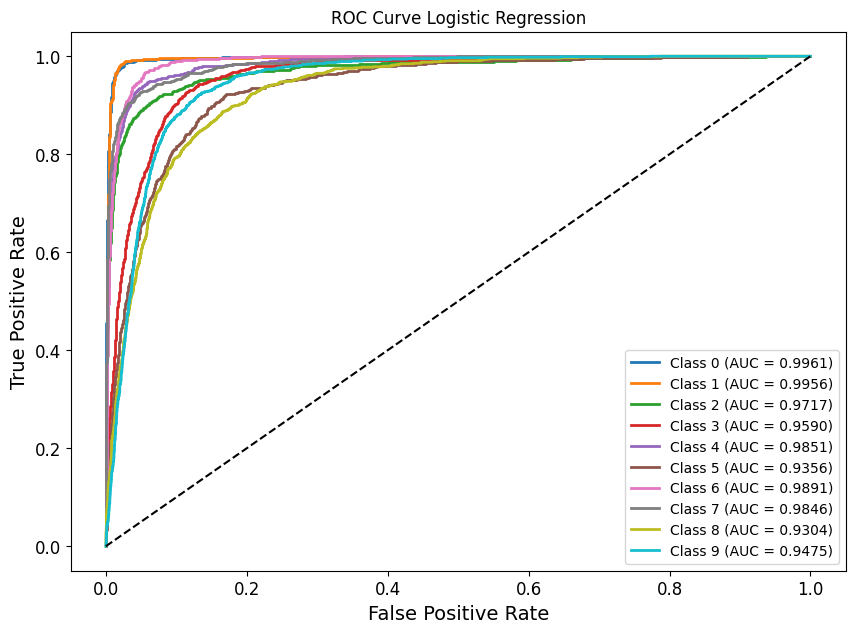

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# Convert labels to binary format for multiclass
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Define a function to plot ROC curve for multiclass
def plot_roc_curve_multiclass(model, X_test, y_test, n_classes, label):
    y_score = model.decision_function(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 7))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve ' + label)
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for both models
plot_roc_curve_multiclass(svm_clf, X_test, y_test, len(np.unique(y_test)), 'LinearSVC')
plot_roc_curve_multiclass(log_reg, X_test, y_test, len(np.unique(y_test)), 'Logistic Regression')


- **High TPR, Low FPR**: An ideal scenario where the model achieves high sensitivity while minimizing false positives.
- **Steep ROC Curve**: Indicates strong model performance, characterized by high TPR at lower FPR.
- **Higher AUC**: Reflects better overall model performance, with increased discrimination between classes.
- **Coclusion**: So as you can see generally SVM performed worse, but for some classes it works better (example is class 9).

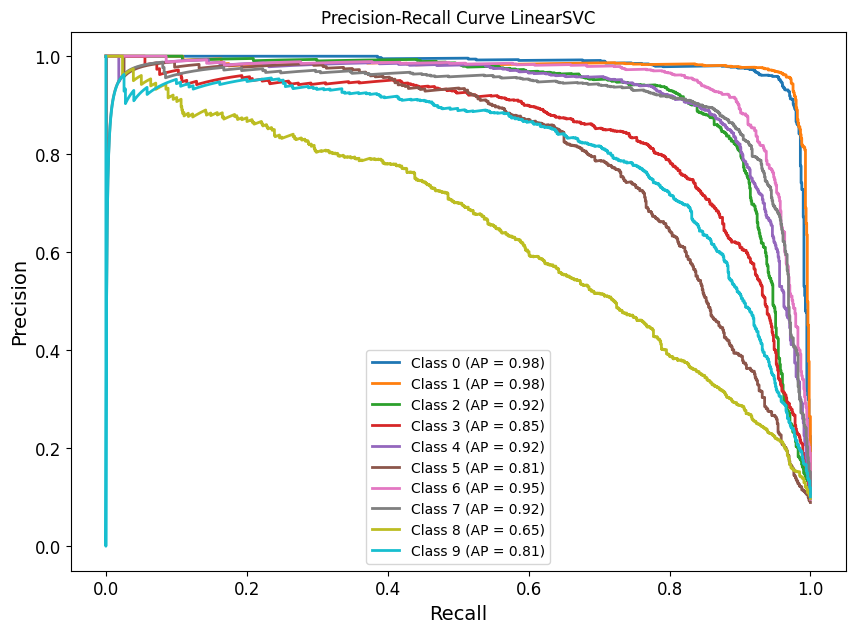

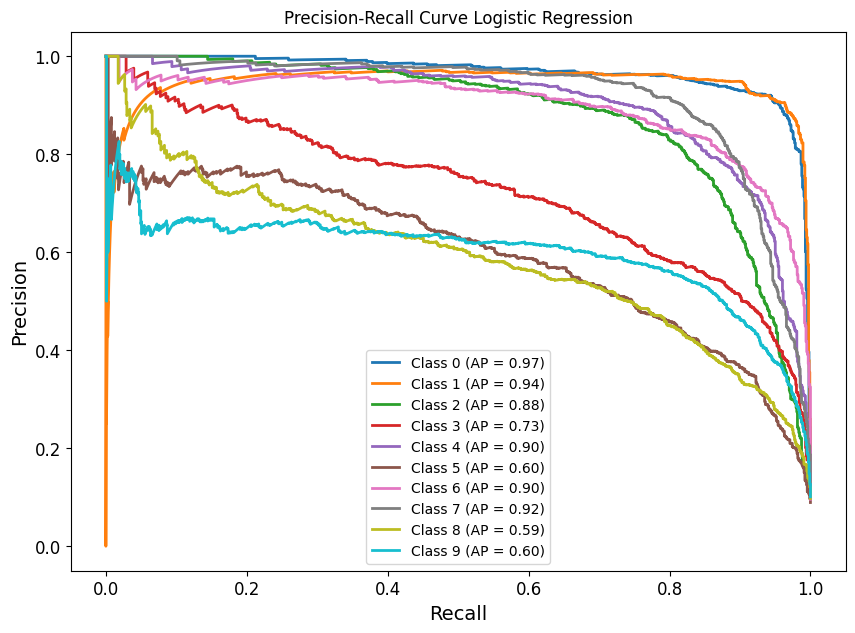

In [27]:

# Define a function to plot precision-recall curve for multiclass
def plot_precision_recall_curve_multiclass(model, X_test, y_test, n_classes, label):
    y_score = model.decision_function(X_test)
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

    plt.figure(figsize=(10, 7))
    for i in range(n_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP = {average_precision[i]:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve ' + label)
    plt.legend(loc="best")
    plt.show()

# Plot precision-recall curves for both models
plot_precision_recall_curve_multiclass(svm_clf, X_test, y_test, len(np.unique(y_test)), 'LinearSVC')
plot_precision_recall_curve_multiclass(log_reg, X_test, y_test, len(np.unique(y_test)), 'Logistic Regression')


- **High Precision, High Recall**: This is when our model is really good at both making correct positive predictions (precision) and finding most of the positive instances (recall).

- **Steep Precision-Recall Curve**: A steep curve means our model is doing a great job, especially when we care a lot about making accurate positive predictions.
  
- **Higher Average Precision (AP)**: This just means our model is doing better overall.

- **Conclusion**: Overall, looking at precision-recall curves helps us understand how our models are doing. Even if one model seems to be better overall, it's essential to consider specific cases. For example, in our case, even though SVM didn't perform as well overall, it might be better for certain classes, like class 9.


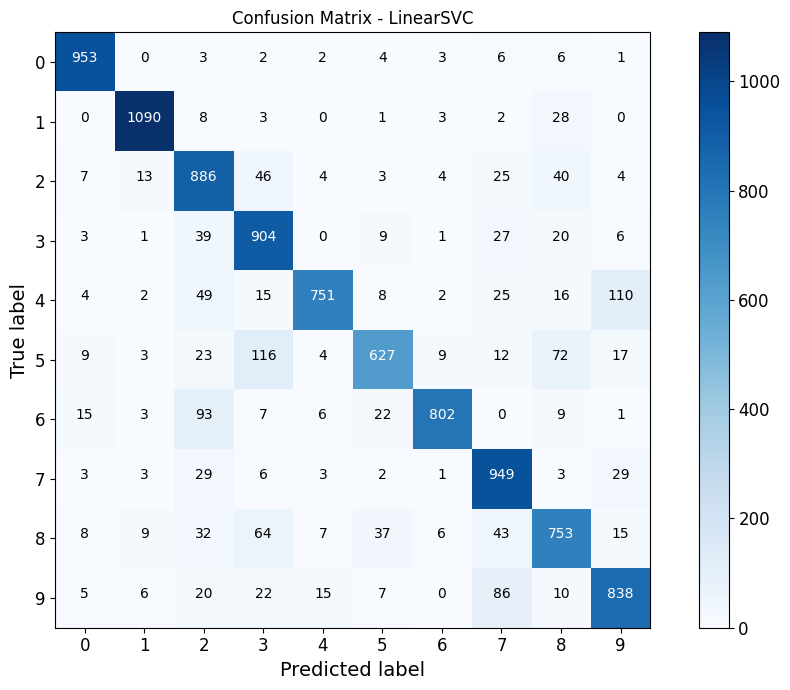

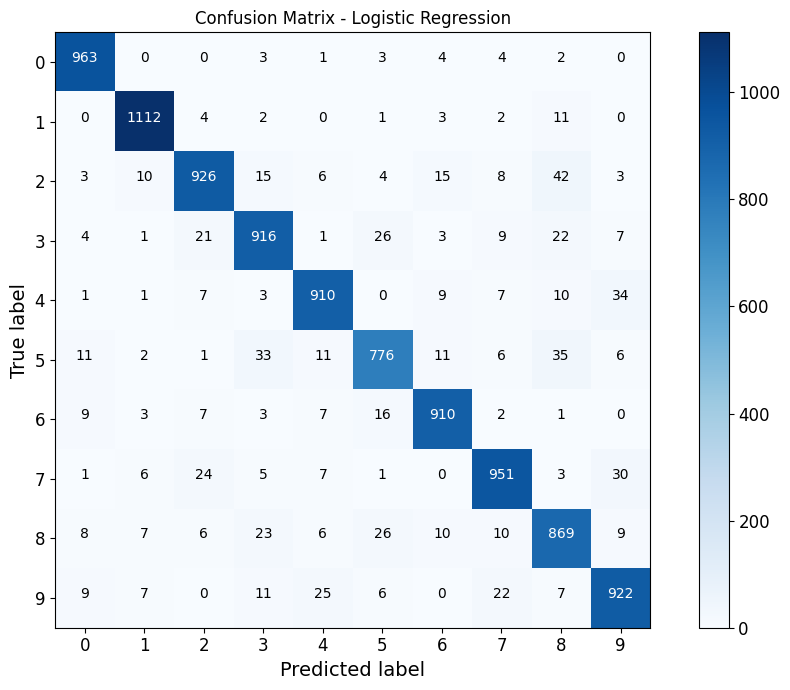

In [13]:
import itertools

def plot_confusion_matrix_multiclass(model, X_test, y_test, classes, label):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {label}')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot confusion matrices for both models
plot_confusion_matrix_multiclass(svm_clf, X_test, y_test, classes=np.unique(y_test), label='LinearSVC')
plot_confusion_matrix_multiclass(log_reg, X_test, y_test, classes=np.unique(y_test), label='Logistic Regression')

Problem 2. Normalize the features and re-train SVM with linear kernel. How did the accuracy change?

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM classifier with a linear kernel on the scaled features
svm_clf_scaled = LinearSVC()
svm_clf_scaled.fit(X_train_scaled, y_train)

# Calculate accuracy on the scaled test data
svm_accuracy_scaled = svm_clf_scaled.score(X_test_scaled, y_test)

# Print the accuracy
print("SVM Accuracy (scaled features):", svm_accuracy_scaled)

C:\Users\Pavlo\anaconda3\envs\studying\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM Accuracy (scaled features): 0.9119


C:\Users\Pavlo\anaconda3\envs\studying\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\Pavlo\anaconda3\envs\studying\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


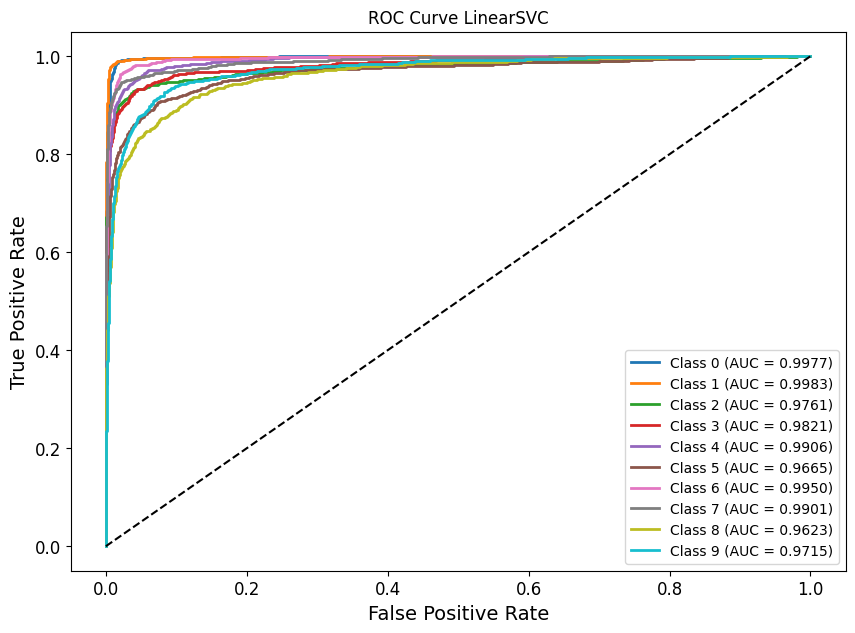

In [33]:
plot_roc_curve_multiclass(svm_clf_scaled, X_test, y_test, len(np.unique(y_test)), 'LinearSVC')

- **Conclusion**: Accuracy significantly increased


Problem 3. Train SVM with a gaussian kernel. How did the accuracy change?

In [35]:
# Train the SVM classifier with a Gaussian kernel
svm_gaussian = SVC(kernel="rbf")
svm_gaussian.fit(X_train, y_train)

# Calculate accuracy on the test data
svm_accuracy_gaussian = svm_gaussian.score(X_test, y_test)

# Print the accuracy
print("SVM Accuracy (Gaussian kernel):", svm_accuracy_gaussian)

SVM Accuracy (Gaussian kernel): 0.9792


- **Conclusion**: Accuracy significantly increased


Problem 4. Find best model hyperparameters by using brute force (GridSearch) and random search(RandomSearchCV). Use only a part of training set for this subtask (as a validation set) to reduce the computational cost. Finally train the model on the whole training dataset. What is the obtained accuracy?

https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html